In [18]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns
plt.style.use("https://raw.githubusercontent.com/FabianSchubert/mpl_style/main/custom_style.mplstyle")

plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 8

col_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
results_files = []

results_folders = [
    f for f in listdir("./results_data/") if not isfile(join("./results_data/", f))
]

for k, folder in enumerate(results_folders):
    _files = [
        f
        for f in listdir(join("./results_data/", folder))
        if isfile(join(join("./results_data/", folder), f))
    ]
    results_files.extend([(join("./results_data", folder, f), folder) for f in _files])


for k, (file, device) in enumerate(results_files):
    _data = np.load(file, allow_pickle=True)

    _df = pd.DataFrame(
        {
            "Train Time [s]": _data["train_time"][()],
            "False Positive": _data["false_pos"][()],
            "False Negative": _data["false_neg"][()],
            "Error": _data["err"][()],
            "Event Based": _data["event_based"][()],
            "Threshold Scale": _data["settings"][()]["TH_SCALE"],
            "Device": device,
        },
        index=[k],
    )

    if k == 0:
        df_results = _df
    else:
        df_results = pd.concat([df_results, _df], ignore_index=True)

In [4]:
df_results

,Train Time [s],False Positive,False Negative,Error,Event Based,Threshold Scale,Device
0,62.403196,0.069307,0.12,0.090909,True,1.000000,rtx_4080
1,58.622128,0.000000,0.87,0.000000,True,10.000000,rtx_4080
2,71.218432,0.039604,0.03,0.020619,False,1.000000,rtx_4080
3,58.397676,0.009901,0.36,0.250000,True,4.641590,rtx_4080
4,67.020818,0.000000,0.07,0.043011,True,0.464159,rtx_4080
...,...,...,...,...,...,...,...
425,149.960460,0.009901,0.08,0.086957,True,0.010000,rtx_3080
426,156.474883,0.019802,0.04,0.052083,True,0.010000,rtx_3080
427,116.111272,0.069307,0.02,0.000000,False,1.000000,rtx_3080
428,105.435088,0.059406,0.06,0.063830,True,0.215443,rtx_3080


/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

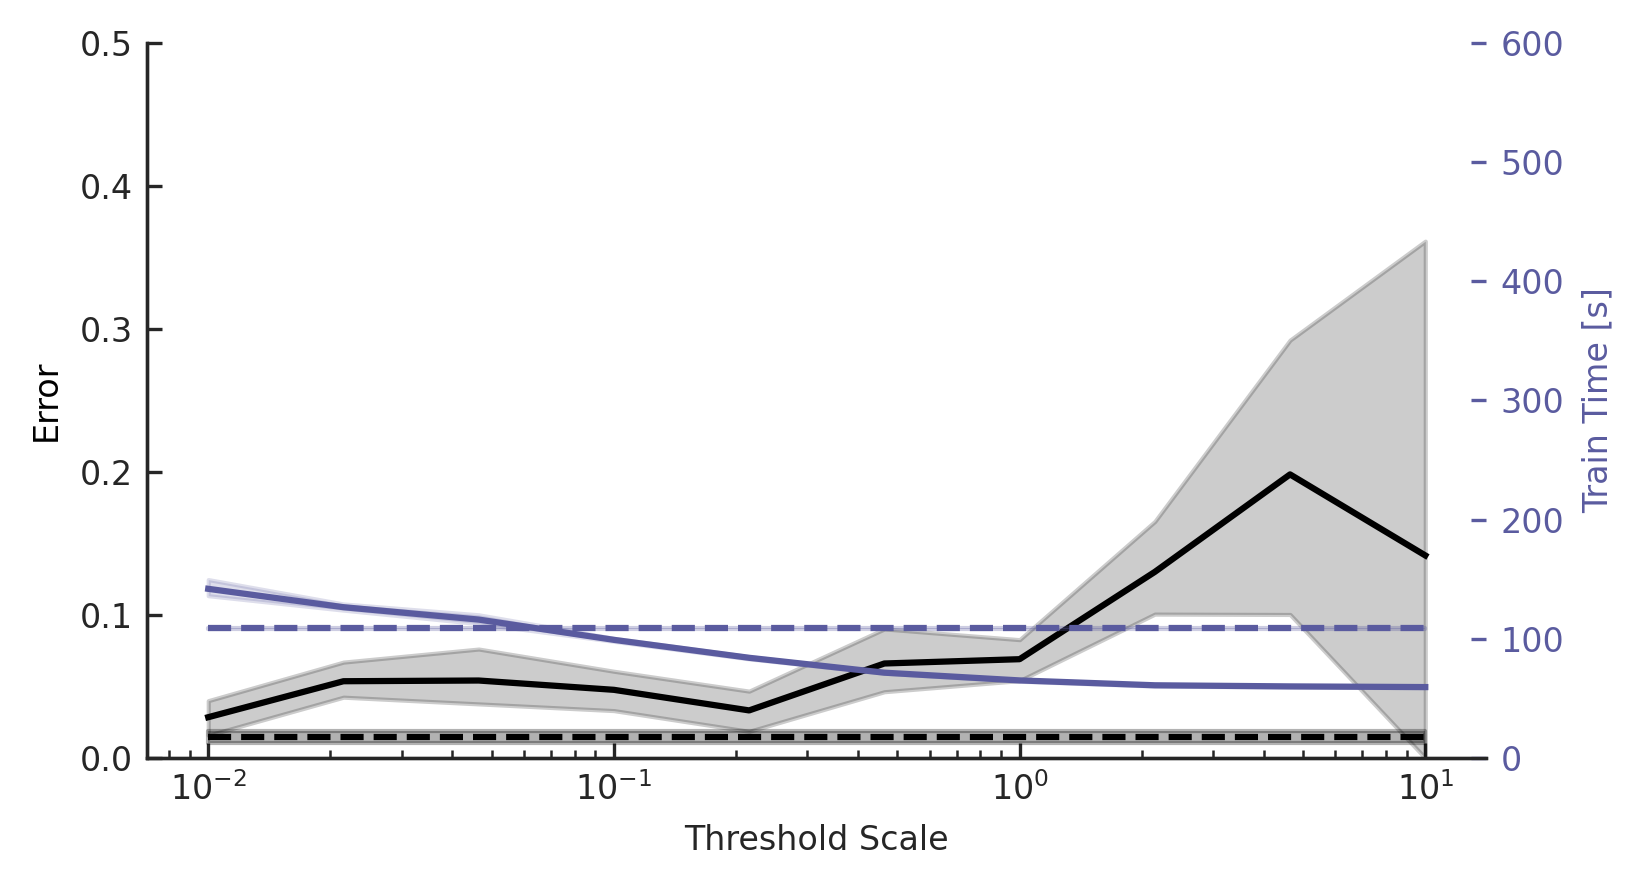

In [19]:
DEVICE = "rtx_2060_mobile"

df_filt = df_results[df_results["Device"] == DEVICE].drop("Device", axis=1)

fig, ax = plt.subplots(1, 1, figsize=(5.5, 3))

ax2 = ax.twinx()

sns.lineplot(
    data=df_filt[df_filt["Event Based"] == True],
    x="Threshold Scale",
    y="Error",
    color="k",
    ax=ax,
)
sns.lineplot(
    data=df_filt[df_filt["Event Based"] == True], x="Threshold Scale", y="Train Time [s]", color=col_cycle[0], ax=ax2
)

th_scale = [df_results["Threshold Scale"].min(), df_results["Threshold Scale"].max()]

avg_cont = df_filt[df_filt["Event Based"] == False].mean()
sem_cont = df_filt[df_filt["Event Based"] == False].sem()

_avg_err_cont = avg_cont["Error"]
_sem_err_cont = sem_cont["Error"]
ax.plot(th_scale, [_avg_err_cont, _avg_err_cont], "--", color="k")
ax.fill_between(
    th_scale,
    [_avg_err_cont - _sem_err_cont, _avg_err_cont - _sem_err_cont],
    [_avg_err_cont + _sem_err_cont, _avg_err_cont + _sem_err_cont],
    alpha=0.3,
    color="k",
)

_avg_rt_cont = avg_cont["Train Time [s]"]
_sem_rt_cont = sem_cont["Train Time [s]"]

ax2.plot(th_scale, [_avg_rt_cont, _avg_rt_cont], "--", color=col_cycle[0])
ax2.fill_between(
    th_scale,
    [_avg_rt_cont - _sem_rt_cont, _avg_rt_cont - _sem_rt_cont],
    [_avg_rt_cont + _sem_rt_cont, _avg_rt_cont + _sem_rt_cont],
    alpha=0.3,
    color=col_cycle[0],
)

ax.set_xscale("log")

ax.yaxis.label.set_color("k")

ax2.yaxis.label.set_color(col_cycle[0])
ax2.tick_params(axis='y', colors=col_cycle[0])

ax2.set_ylim(0, 600)
ax.set_ylim(0, 0.5)

fig.tight_layout()

plt.show()

/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabian/miniconda3/envs/pygenn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

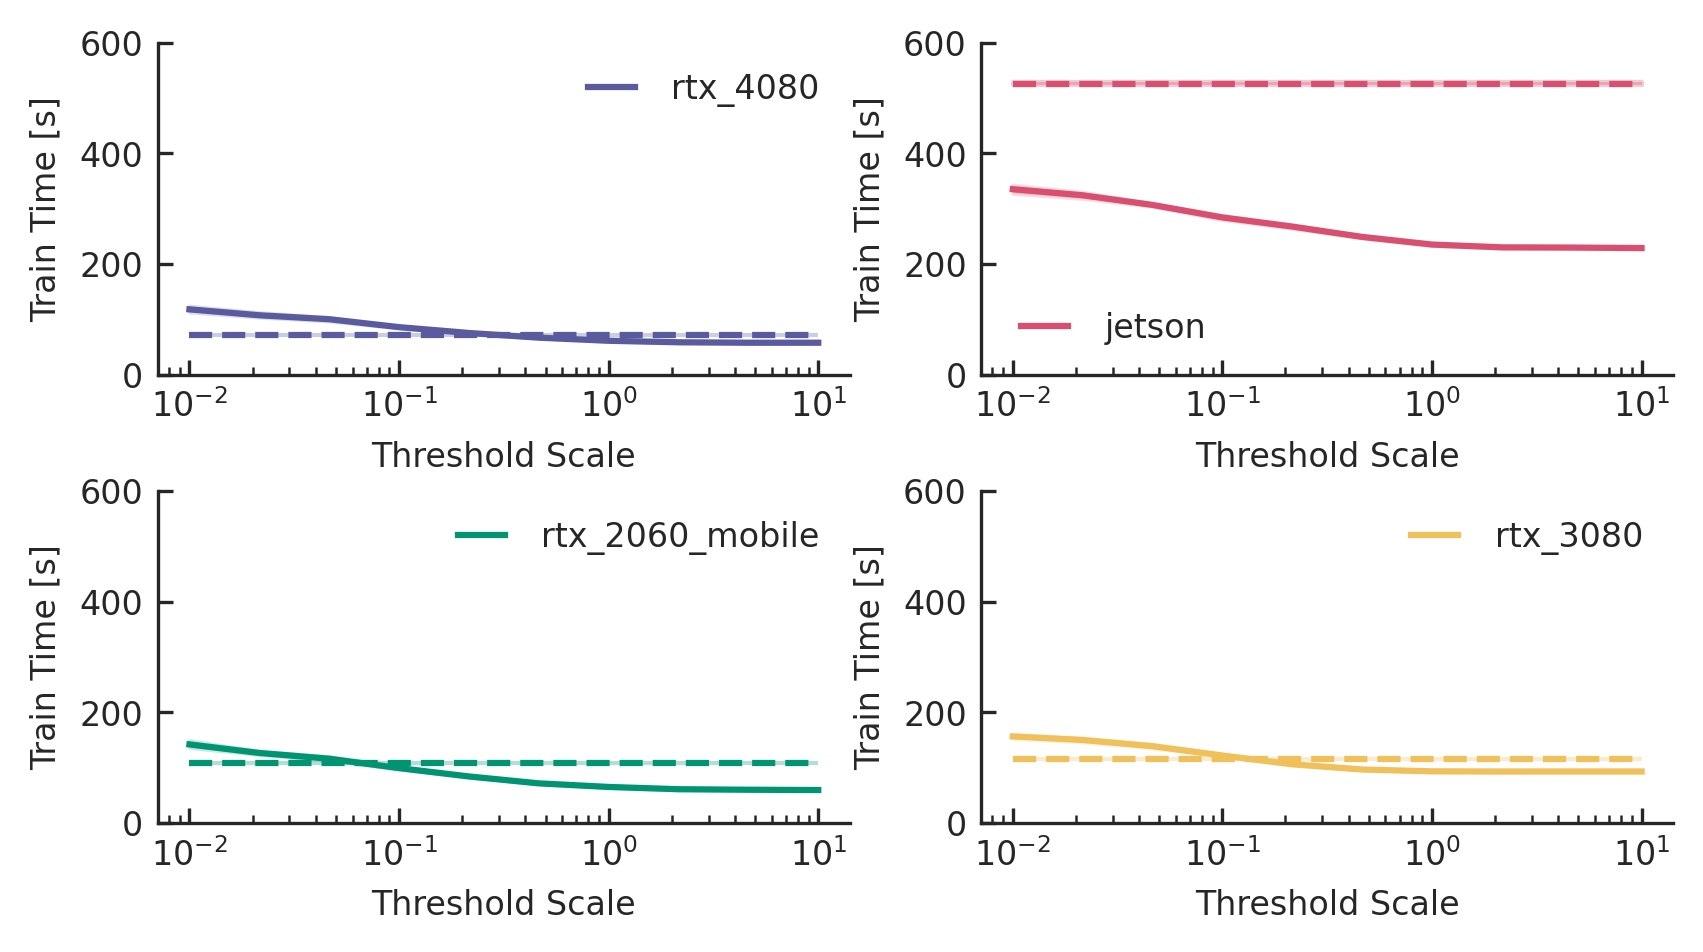

In [20]:
DEVICES = df_results["Device"].unique()

fig, ax = plt.subplots(2, 2, figsize=(5.5, 3))

for k, DEVICE in enumerate(DEVICES):
    df_filt = df_results[df_results["Device"] == DEVICE].drop("Device", axis=1)

    _ax = ax[k // 2, k % 2]

    sns.lineplot(
        data=df_filt[df_filt["Event Based"] == True],
        x="Threshold Scale",
        y="Train Time [s]",
        color=col_cycle[k],
        ax=_ax,
        label=DEVICE,
    )

    th_scale = [
        df_results["Threshold Scale"].min(),
        df_results["Threshold Scale"].max(),
    ]

    avg_cont = df_filt[df_filt["Event Based"] == False].mean()
    sem_cont = df_filt[df_filt["Event Based"] == False].sem()

    _avg_rt_cont = avg_cont["Train Time [s]"]
    _sem_rt_cont = sem_cont["Train Time [s]"]

    _ax.plot(th_scale, [_avg_rt_cont, _avg_rt_cont], "--", color=col_cycle[k])
    _ax.fill_between(
        th_scale,
        [_avg_rt_cont - _sem_rt_cont, _avg_rt_cont - _sem_rt_cont],
        [_avg_rt_cont + _sem_rt_cont, _avg_rt_cont + _sem_rt_cont],
        alpha=0.3,
        color=col_cycle[k],
    )

    _ax.set_xscale("log")

    _ax.legend()

#ax.yaxis.label.set_color("k")

    _ax.set_ylim(0, 600)

fig.tight_layout(pad=0.1)

plt.show()

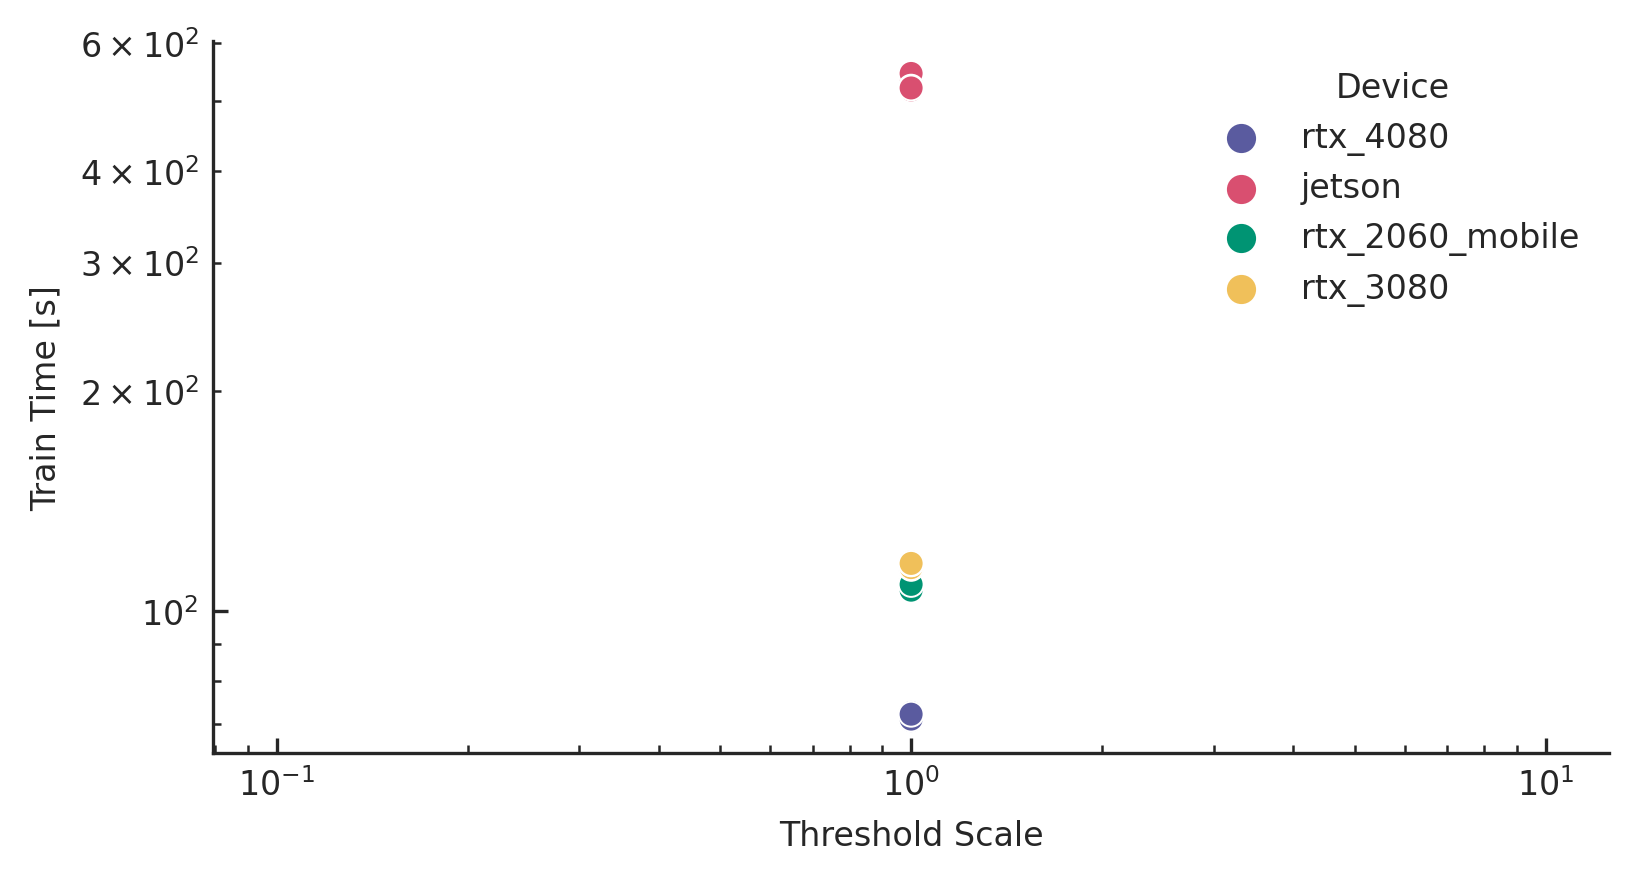

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 3))

#sns.lineplot(
#    data=df_results[df_results["Event Based"] == True],
#    x="Threshold Scale",
#    y="Train Time [s]",
#    hue="Device",
#    ax=ax,
#)

sns.scatterplot(
    data=df_results[df_results["Event Based"] == False],
    x="Threshold Scale",
    y="Train Time [s]",
    hue="Device",
    ax=ax,
)

'''
th_scale = [df_results["Threshold Scale"].min(), df_results["Threshold Scale"].max()]

avg_cont = df_filt[df_filt["Event Based"] == False].mean()
sem_cont = df_filt[df_filt["Event Based"] == False].sem()

_avg_err_cont = avg_cont["Error"]
_sem_err_cont = sem_cont["Error"]
ax.plot(th_scale, [_avg_err_cont, _avg_err_cont], "--", color="k")
ax.fill_between(
    th_scale,
    [_avg_err_cont - _sem_err_cont, _avg_err_cont - _sem_err_cont],
    [_avg_err_cont + _sem_err_cont, _avg_err_cont + _sem_err_cont],
    alpha=0.3,
    color="k",
)

_avg_rt_cont = avg_cont["Train Time [s]"]
_sem_rt_cont = sem_cont["Train Time [s]"]

ax2.plot(th_scale, [_avg_rt_cont, _avg_rt_cont], "--", color=col_cycle[0])
ax2.fill_between(
    th_scale,
    [_avg_rt_cont - _sem_rt_cont, _avg_rt_cont - _sem_rt_cont],
    [_avg_rt_cont + _sem_rt_cont, _avg_rt_cont + _sem_rt_cont],
    alpha=0.3,
    color=col_cycle[0],
)



ax.yaxis.label.set_color("k")

ax2.yaxis.label.set_color(col_cycle[0])
ax2.tick_params(axis='y', colors=col_cycle[0])

ax2.set_ylim(0, 600)
ax.set_ylim(0, 0.5)
'''

ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_ylim(0, 600)

fig.tight_layout()

plt.show()

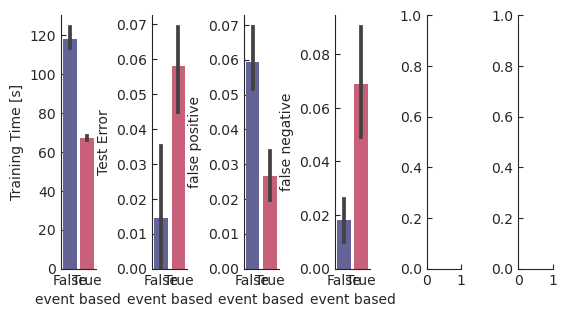

In [70]:
fig, ax = plt.subplots(2, 4, figsize=(5.5,3))

sns.barplot(data=df_results, x="event based", y="train time", ax=ax[0])
sns.barplot(data=df_results, x="event based", y="error", ax=ax[1])
sns.barplot(data=df_results, x="event based", y="false positive", ax=ax[2])
sns.barplot(data=df_results, x="event based", y="false negative", ax=ax[3])

ax[0].set_ylabel("Training Time [s]")
ax[1].set_ylabel("Test Error")

fig.tight_layout(pad=0.1)

plt.show()